# Assignment Overview


## Background Story  

In the ever-evolving landscape of e-commerce, understanding customer behavior has become a cornerstone of strategic marketing. An emerging e-commerce giant, "FarTrend," has experienced rapid growth by offering a wide range of products from fashion to electronics, catering to over 3400 customers across diverse demographics. Despite their success, FarTrend faces challenges in personalizing marketing efforts and predicting future purchasing behavior, crucial for sustaining growth and enhancing customer satisfaction.

## The Challenge

FarTrend's extensive customer database reveals purchasing patterns over the past year but lacks actionable insights to anticipate the needs of new customers. Traditional marketing strategies have yielded moderate success; however, the leadership team believes that a more data-driven approach could unlock exponential growth.

You are working on the marketing intelligence team! Your goal is to develop a  machine learning model that segments FarTrend's customer base and predicts future purchases of new customers within their first year. This model aims to transform FarTrend approach to customer engagement by delivering personalized marketing campaigns and tailored product recommendations.

## Data Description

The IT extracted a dataframe with the main transaction performed by the customers. 

##### Variables
InvoiceNo: Invoice number. A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name.

Quantity: The quantities of each product (item) per transaction. 

InvoiceDate: The day and time when each transaction was generated.

UnitPrice: Product price per unit.

CustomerID: Unique customer number. 

Country: The name of the country where each customer resides.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)


In [775]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [776]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter

In [777]:
#Data set loading
df = pd.read_excel("/Users/manuelpantaleo/Desktop/Machine Learning/Assignment 2/FarTrend_eRetail.xlsx")

#### Initial Data Analysis

In [778]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [779]:
df.shape

(541909, 8)

In [780]:
# Check for missing values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [781]:
# Check data types

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [782]:
# summary statistics for numerical variables 
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000



- We have a negative value of -80995 this might mean that some product have been returned or cancelled 
Unit price
- The same thing applies to unit price but here it is strange as usually prices are never negative.
- As fo Customer ID there are 135080 NaN which needs to be addressed 

In [783]:
# summary statistics for categorical variables
df.describe(include="object")

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


- InvoiceNo has 25,900 unique values, with the most frequent being 573585.
- StockCode has 4,070 unique values, and 85123A is the most frequent.
- Description indicates there are 4,223 unique product descriptions, with "WHITE HANGING HEART T-LIGHT HOLDER" being the most common. 
  There ar elso some missing values here which need to be handled
- As for Country the dataset mostly comprises transactions from the United Kingdom, given its high frequency in the Country column.

#### Data cleaning and transformation

In [784]:
# check for percentage of missing values 

missing_values_percentage = ((df.isna().sum())/len(df))*100
missing_values_percentage


InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

- The percentag of custoemrs id misisng is about 25. Which is a pretty high percentage but given the scope of the assignment which is to predict customer behaviour through clustering and then create a reccomendation system it makes sense to drop these values to not have biases.
- As for description the percenatge fo values missing is about 27. Given the small percentage which represents probable errors in the entries it would be ideal to drop those values too.

In [785]:
df.dropna(subset=["Description", "CustomerID"], axis=0, inplace=True)

The NaNs are not dropped. It might be due to a datatype mismatch 

In [786]:
df.isna().sum().sum()

0

Now let's handle duplicates

In [787]:
# I mark them as True so that we can compare 
duplicate_rows = df[df.duplicated(keep=False)]

In [788]:
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode'])
duplicate_rows_sorted

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
440149,C574510,22360,GLASS JAR ENGLISH CONFECTIONERY,-1,2011-11-04 13:25:00,2.95,15110.0,United Kingdom
461407,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
461408,C575940,23309,SET OF 60 I LOVE LONDON CAKE CASES,-24,2011-11-13 11:38:00,0.55,17838.0,United Kingdom
529980,C580764,22667,RECIPE BOX RETROSPOT,-12,2011-12-06 10:38:00,2.95,14562.0,United Kingdom


In [789]:
df.duplicated().sum()

5225

There are 5225 duplicates so now I am going to drop them since the presence of those could compromise the creation of the recommendation system

In [790]:
df.drop_duplicates(keep="first", inplace=True) # either first or last in this case would be the same since all the duplicates are exact the same

In [791]:
df.duplicated().sum()

0

Now, I'm going to analyse the cancelled transactions 

In [792]:
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')
cancelled_transactions = df[df["Transaction_Status"]== "Cancelled"]
cancelled_transactions.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,Cancelled
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,Cancelled
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,Cancelled
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,Cancelled
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,Cancelled
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,Cancelled


In [793]:
# Now we have a look at the summarry statistics considering the new column 
cancelled_transactions.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


We can see that all the quantities of the cancelled transactions are negative. So the assumption made before about orders deleted it's true. I am going to keep those transactions as they could be useful for the clustering and recomendation system.

Now let's how many unique products (stock codes) there are.

In [794]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()
unique_stock_codes

3684

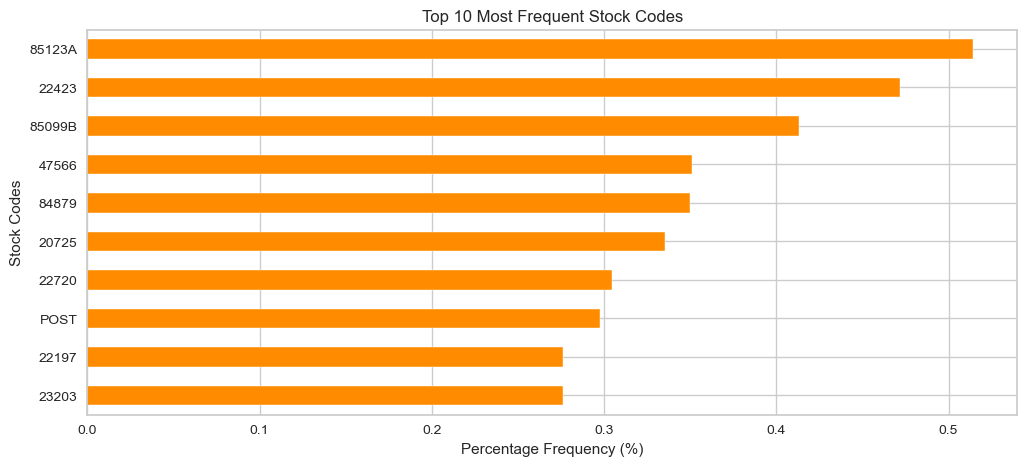

In [795]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh')

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

The dataset has 3684 unique products indicating a wide range of products. Also most codes are made of either 5 or 6 numbers except for one which is POST. So to move on on our reaserch we should check the frequency of the number of numeric characters of these codes.

In [796]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

print(numeric_char_counts_in_unique_codes)

5    3676
0       7
1       1
dtype: int64


Now let's delve into the stock codes that have 0 and 1 characters

In [797]:
strange_stock_codes = [code for code in unique_stock_codes if all(not c.isdigit() or c.isspace() for c in str(code))]

print("\n".join(strange_stock_codes))

POST
D
M
BANK CHARGES
PADS
DOT
CRUK


Given that those codes are not relevant for the scope of our research where we have to segment customers and build a recomandation system it makes much more sense to drop these codes.

In [798]:
df = df[~df['StockCode'].apply(lambda x: x in strange_stock_codes)]

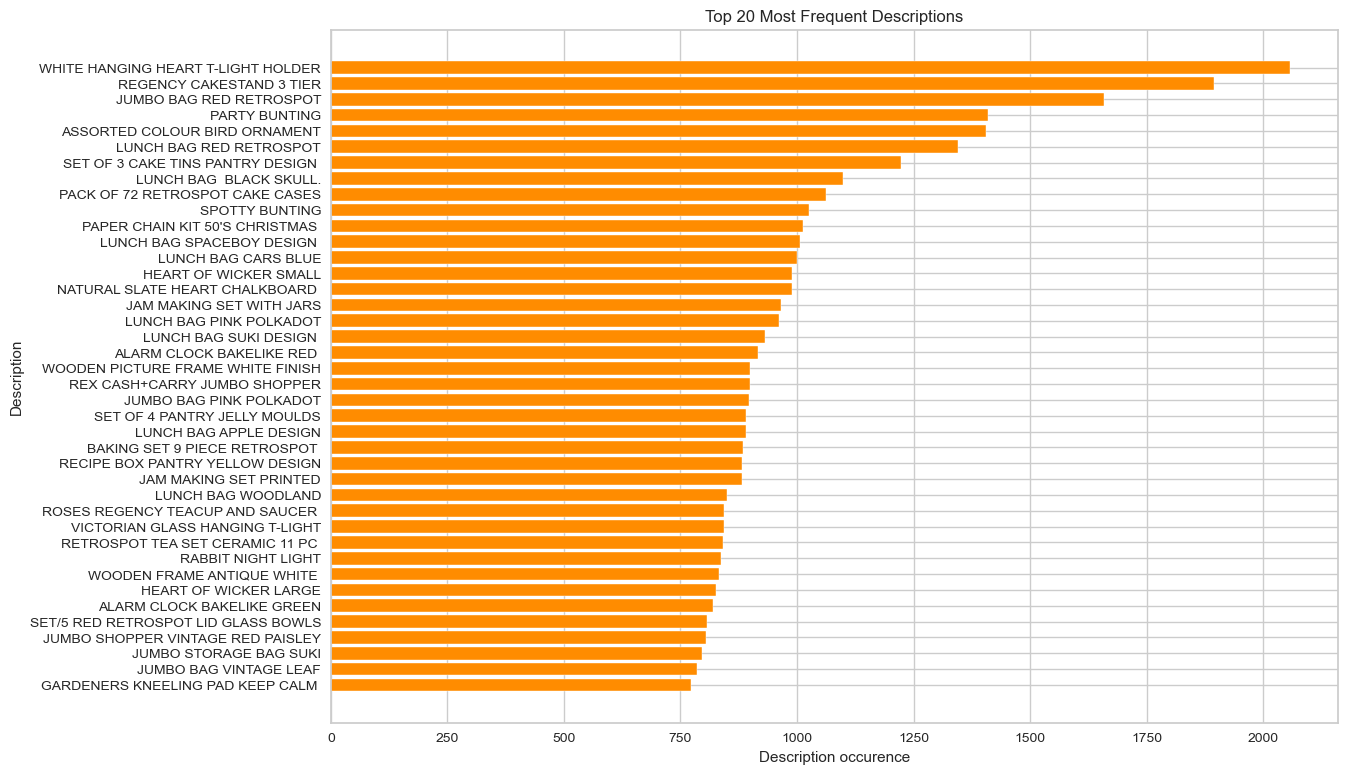

In [799]:
description_counts = df['Description'].value_counts()

top_20_descriptions = description_counts[:40]
top_20_descriptions

plt.figure(figsize=(13,9))
plt.barh(top_20_descriptions.index[::-1], top_20_descriptions.values[::-1])
plt.xlabel("Description occurence")
plt.ylabel("Description")
plt.title("Top 20 Most Frequent Descriptions")

plt.show()

In [800]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,399823.000000,399823.000000,399823.000000
mean,12.225617,2.923285,15288.460319
std,250.794906,4.537682,1710.619396
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13959.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,649.500000,18287.000000


Now let's try to understand why we have 0 unit prices

In [801]:
unit_price_count = len(df[df["UnitPrice"]== 0])
unit_price_count

33

In [802]:
unit_price_0_value = df[df["UnitPrice"]==0]
unit_price_0_value.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany,Completed
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom,Completed
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE,Completed
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,Completed
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom,Completed
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,2011-01-13 15:10:00,0.0,15107.0,United Kingdom,Completed
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2011-02-10 13:08:00,0.0,17560.0,United Kingdom,Completed
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,2011-03-23 10:25:00,0.0,13239.0,United Kingdom,Completed
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,2011-03-30 12:45:00,0.0,13113.0,United Kingdom,Completed
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,2011-04-04 14:42:00,0.0,14410.0,United Kingdom,Completed


0 unit prices are only 33 and do not have significant meaning for developing a recommendation system. Therefore I will filter the dataset to keep only transactions with unit price greater than 0

In [803]:
df = df[df["UnitPrice"] > 0]

#### Outliers detection 

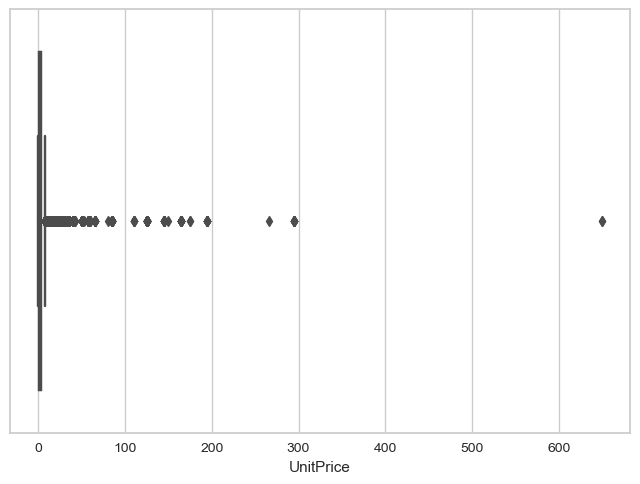

In [804]:
# Boxplots to visualize potential outliers
sns.boxplot(x=df['UnitPrice'])
plt.show()

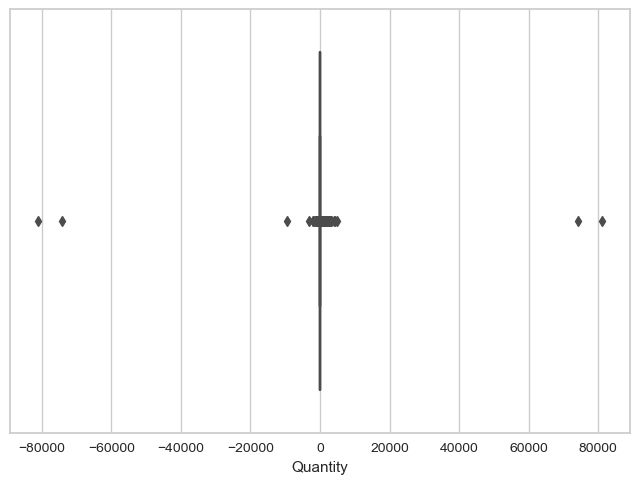

In [805]:
sns.boxplot(x=df['Quantity'])
plt.show()

Givent that outliers might have valuable information for the next step I will deal with them after feature engineering.

#### Feature Engineering

I will starting by creating 2 basic features which are the number of transactions made by each customer and the number of products purchased. The former will help understand us the level of engagement of the customer and the latter will provide valuable insights on the customer behaviour in terms of volume.

In [806]:

# Calculate the total number of transactions made by each customer
total_transactions = df.groupby("CustomerID")["InvoiceNo"].nunique().reset_index()
total_transactions.rename(columns={"InvoiceNo": 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products = df.groupby("CustomerID")["StockCode"].nunique().reset_index()
total_products.rename(columns={"StockCode": "Total_Products"}, inplace = True)

# Create dataframe called customer_df that will contain all the features
customer_df = total_transactions[["CustomerID", "Total_Transactions"]]
customer_df = pd.merge(customer_df, total_products, on="CustomerID")

customer_df.head(5)

,CustomerID,Total_Transactions,Total_Products
0,12346.0,2,1
1,12347.0,7,103
2,12348.0,4,21
3,12349.0,1,72
4,12350.0,1,16


In [807]:
# Calculate the total spend by each customer
df["Total_spent"] = df["UnitPrice"] * df["Quantity"]
total_spent = df.groupby("CustomerID")["Total_spent"].sum().reset_index()

# Calculate the average transaction value for each customer
avg_transaction_value = total_spent.merge(total_transactions, on='CustomerID')
avg_transaction_value["Average_transaction_value"] = avg_transaction_value['Total_spent'] / avg_transaction_value['Total_Transactions']

# Merge new feautures
customer_df = pd.merge(customer_df, avg_transaction_value[['CustomerID', 'Average_transaction_value']], on='CustomerID')
customer_df.head()

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value
0,12346.0,2,1,0.000000
1,12347.0,7,103,615.714286
2,12348.0,4,21,359.310000
3,12349.0,1,72,1457.550000
4,12350.0,1,16,294.400000


Now I am going to calculate the number of unique products purchased by each customer. In this way we will be able to understand the product diversity of the customers which will be helpful for the product segmentation

In [808]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_df = pd.merge(customer_df, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_df.head()

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased
0,12346.0,2,1,0.000000,1
1,12347.0,7,103,615.714286,103
2,12348.0,4,21,359.310000,21
3,12349.0,1,72,1457.550000,72
4,12350.0,1,16,294.400000,16


Now I will compute the length of time since the customer's most recent purchase which can indicate loyalty. I will call this variable Days_since_last_purchase.

In [809]:

# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
cust_df = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
cust_df['InvoiceDay'] = pd.to_datetime(cust_df['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
cust_df['Days_Since_Last_Purchase'] = (most_recent_date - cust_df['InvoiceDay']).dt.days

# Merge with customer_df
customer_df = pd.merge(customer_df, cust_df, on="CustomerID")
customer_df.drop(columns=['InvoiceDay'], inplace=True)
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase
0,12346.0,2,1,0.000000,1,325
1,12347.0,7,103,615.714286,103,2
2,12348.0,4,21,359.310000,21,75
3,12349.0,1,72,1457.550000,72,18
4,12350.0,1,16,294.400000,16,310
...,...,...,...,...,...,...
4357,18280.0,1,10,180.600000,10,277
4358,18281.0,1,7,80.820000,7,180
4359,18282.0,3,12,58.866667,12,7
4360,18283.0,16,262,127.473750,262,3


Now I will create a feature called country can help us understand region-specific buying patterns and preferences

In [810]:
df['Country'].value_counts(normalize=True).head()

United Kingdom    0.890768
Germany           0.022712
France            0.020396
EIRE              0.018677
Spain             0.006158
Name: Country, dtype: float64

In [811]:

# Group by CustomerID and Country to get the number of transactions per country for each customer
cust_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
cust_main_country = cust_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
cust_main_country['Is_UK'] = cust_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_df = pd.merge(customer_df, cust_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_df.head()

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK
0,12346.0,2,1,0.000000,1,325,1
1,12347.0,7,103,615.714286,103,2,0
2,12348.0,4,21,359.310000,21,75,0
3,12349.0,1,72,1457.550000,72,18,0
4,12350.0,1,16,294.400000,16,310,0


Now I am gong to calculate Purchase Consistency which refers to the regularity of a customer's purchases over time. A common way to calculate this would be to look at the frequency of their transactions during a certain period. For instance, if a customer consistently makes a purchase every month, they would have high purchase consistency. The closer the value is to 1, the more consistent the customer is in making purchases. For instance, a value of 0.5 would suggest that the customer made purchases in half of the total periods.

In [812]:
# Convert InvoiceDate to datetime if it isn't already.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Set the period for consistency checks. Here we use 'M' for monthly.
df['Period'] = df['InvoiceDate'].dt.to_period('M')

# Group by CustomerID and Period and count the number of unique periods with transactions.
transactions_per_period = df.groupby(['CustomerID', 'Period']).size().reset_index(name='Transactions')

# Now count the number of periods each customer made a purchase.
periods_with_purchase = transactions_per_period.groupby('CustomerID').size().reset_index(name='Periods_with_Purchase')

# Get the total number of periods from the first to the last purchase for each customer.
first_last_purchase = df.groupby('CustomerID')['InvoiceDate'].agg(['min', 'max'])
first_last_purchase['Total_Periods'] = (first_last_purchase['max'].dt.to_period('M') - first_last_purchase['min'].dt.to_period('M')).apply(lambda r: r.n + 1)

# Merge this information back to the periods_with_purchase dataframe.
consistency_df = pd.merge(periods_with_purchase, first_last_purchase[['Total_Periods']], left_on='CustomerID', right_index=True)

# Calculate the Purchase Consistency as the ratio of Periods_with_Purchase to Total_Periods.
consistency_df['Purchase_Consistency'] = consistency_df['Periods_with_Purchase'] / consistency_df['Total_Periods']

# Merge this back with your customer dataframe.
customer_df = pd.merge(customer_df, consistency_df[['CustomerID', 'Purchase_Consistency']], on='CustomerID')
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency
0,12346.0,2,1,0.000000,1,325,1,1.000000
1,12347.0,7,103,615.714286,103,2,0,0.538462
2,12348.0,4,21,359.310000,21,75,0,0.400000
3,12349.0,1,72,1457.550000,72,18,0,1.000000
4,12350.0,1,16,294.400000,16,310,0,1.000000
...,...,...,...,...,...,...,...,...
4357,18280.0,1,10,180.600000,10,277,1,1.000000
4358,18281.0,1,7,80.820000,7,180,1,1.000000
4359,18282.0,3,12,58.866667,12,7,1,0.400000
4360,18283.0,16,262,127.473750,262,3,1,0.833333


Now i will calculate the average number of days between consecutive purchases, the favorite shopping day of the week and the favorite shoppping hour of the day. Those feautures will enhance the effectiveness of the clustering algorithm, leading to more meaningful customer segments.

In [813]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_df = pd.merge(customer_df, average_days_between_purchases, on='CustomerID')
customer_df = pd.merge(customer_df, favorite_shopping_day, on='CustomerID')
customer_df = pd.merge(customer_df, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_df.head()


,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,2,1,0.000000,1,325,1,1.000000,0.000000,1,10
1,12347.0,7,103,615.714286,103,2,0,0.538462,2.016575,1,14
2,12348.0,4,21,359.310000,21,75,0,0.400000,10.884615,3,19
3,12349.0,1,72,1457.550000,72,18,0,1.000000,0.000000,0,9
4,12350.0,1,16,294.400000,16,310,0,1.000000,0.000000,2,16


Now I am going to calculate how frequent a customer cancel its order. This metric could serve as an indication of dissatisfaction or other underlying issues. By grasping this insight, we can customize strategies aimed at minimizing cancellations and improving overall customer satisfaction.

In [814]:
# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_df dataframe
customer_df = pd.merge(customer_df, cancellation_frequency, on='CustomerID', how='left')

# Replace NaNs with 0
customer_df['Cancellation_Frequency'].fillna(0, inplace=True)

now I'm going to calculate average amount a customer spends monthl which will help us gauge the general spending habit of each customer.
Then I'm going to compute the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month. In contrast, a lower value suggests more stable, consistent spending habits.

In [815]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_spent'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
purchase_behaviour = monthly_spending.groupby('CustomerID')['Total_spent'].agg(['mean', 'std']).reset_index()
purchase_behaviour.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace missing values in Monthly_Spending_Std with 0 meaning no variability for customers with single transaction month.
purchase_behaviour['Monthly_Spending_Std'].fillna(0, inplace=True)

# Merge the new dataset
customer_df = pd.merge(customer_df, purchase_behaviour[['CustomerID', 'Monthly_Spending_Mean', 'Monthly_Spending_Std']], on='CustomerID')
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,2,1,0.000000,1,325,1,1.000000,0.000000,1,10,1.0,0.000000,0.000000
1,12347.0,7,103,615.714286,103,2,0,0.538462,2.016575,1,14,0.0,615.714286,341.070789
2,12348.0,4,21,359.310000,21,75,0,0.400000,10.884615,3,19,0.0,359.310000,203.875689
3,12349.0,1,72,1457.550000,72,18,0,1.000000,0.000000,0,9,0.0,1457.550000,0.000000
4,12350.0,1,16,294.400000,16,310,0,1.000000,0.000000,2,16,0.0,294.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,18280.0,1,10,180.600000,10,277,1,1.000000,0.000000,0,9,0.0,180.600000,0.000000
4282,18281.0,1,7,80.820000,7,180,1,1.000000,0.000000,6,10,0.0,80.820000,0.000000
4283,18282.0,3,12,58.866667,12,7,1,0.400000,9.916667,4,13,1.0,88.300000,14.792674
4284,18283.0,16,262,127.473750,262,3,1,0.833333,0.465181,3,14,0.0,203.958000,165.798738


#### Outliers treatment

Now I am going to apply the Isolation Forest algorithm to identify outliers in your scaled dataset, customer_df. After fitting the model, you predicted outliers (flagging them as -1) and calculated outlier scores, then added these scores and a binary outlier flag (1 for outliers, 0 for inliers) to your original DataFrame for further analysis

In [816]:
from sklearn.ensemble import IsolationForest

# Assuming 'customer_df' is your preprocessed and scaled DataFrame
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)

# Fit the model to the scaled data and predict the outliers; -1 for outliers, 1 for inliers
outliers = iso_forest.fit_predict(customer_df)

# Get the outlier scores (the lower, the more abnormal)
outlier_scores = iso_forest.decision_function(customer_df)

# Add the outlier scores and the predicted outlier flags to the original DataFrame
customer_df['Outlier_Scores'] = outlier_scores
customer_df['Is_Outlier'] = [1 if x == -1 else 0 for x in outliers]
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Outlier_Scores,Is_Outlier
0,12346.0,2,1,0.000000,1,325,1,1.000000,0.000000,1,10,1.0,0.000000,0.000000,0.029047,0
1,12347.0,7,103,615.714286,103,2,0,0.538462,2.016575,1,14,0.0,615.714286,341.070789,0.020542,0
2,12348.0,4,21,359.310000,21,75,0,0.400000,10.884615,3,19,0.0,359.310000,203.875689,-0.008300,1
3,12349.0,1,72,1457.550000,72,18,0,1.000000,0.000000,0,9,0.0,1457.550000,0.000000,-0.021640,1
4,12350.0,1,16,294.400000,16,310,0,1.000000,0.000000,2,16,0.0,294.400000,0.000000,0.024190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,18280.0,1,10,180.600000,10,277,1,1.000000,0.000000,0,9,0.0,180.600000,0.000000,0.081829,0
4282,18281.0,1,7,80.820000,7,180,1,1.000000,0.000000,6,10,0.0,80.820000,0.000000,0.064657,0
4283,18282.0,3,12,58.866667,12,7,1,0.400000,9.916667,4,13,1.0,88.300000,14.792674,0.063903,0
4284,18283.0,16,262,127.473750,262,3,1,0.833333,0.465181,3,14,0.0,203.958000,165.798738,0.026209,0


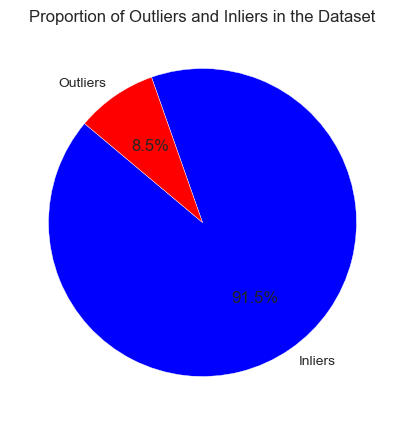

In [817]:
# Assuming customer_df['Is_Outlier'] is a column with 1 indicating outliers and 0 indicating inliers
outlier_counts = customer_df['Is_Outlier'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(outlier_counts, labels=['Inliers', 'Outliers'], autopct='%1.1f%%', startangle=140, colors=['blue', 'red'])
plt.title('Proportion of Outliers and Inliers in the Dataset')
plt.show()


In [818]:
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Outlier_Scores,Is_Outlier
0,12346.0,2,1,0.000000,1,325,1,1.000000,0.000000,1,10,1.0,0.000000,0.000000,0.029047,0
1,12347.0,7,103,615.714286,103,2,0,0.538462,2.016575,1,14,0.0,615.714286,341.070789,0.020542,0
2,12348.0,4,21,359.310000,21,75,0,0.400000,10.884615,3,19,0.0,359.310000,203.875689,-0.008300,1
3,12349.0,1,72,1457.550000,72,18,0,1.000000,0.000000,0,9,0.0,1457.550000,0.000000,-0.021640,1
4,12350.0,1,16,294.400000,16,310,0,1.000000,0.000000,2,16,0.0,294.400000,0.000000,0.024190,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4281,18280.0,1,10,180.600000,10,277,1,1.000000,0.000000,0,9,0.0,180.600000,0.000000,0.081829,0
4282,18281.0,1,7,80.820000,7,180,1,1.000000,0.000000,6,10,0.0,80.820000,0.000000,0.064657,0
4283,18282.0,3,12,58.866667,12,7,1,0.400000,9.916667,4,13,1.0,88.300000,14.792674,0.063903,0
4284,18283.0,16,262,127.473750,262,3,1,0.833333,0.465181,3,14,0.0,203.958000,165.798738,0.026209,0


In [819]:
# Separate the outliers for analysis
outliers_data = customer_df[customer_df['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_df = customer_df[customer_df['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_df = customer_df.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_df.reset_index(drop=True, inplace=True)

In [820]:
customer_df

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,2,1,0.000000,1,325,1,1.000000,0.000000,1,10,1.0,0.000000,0.000000
1,12347.0,7,103,615.714286,103,2,0,0.538462,2.016575,1,14,0.0,615.714286,341.070789
2,12350.0,1,16,294.400000,16,310,0,1.000000,0.000000,2,16,0.0,294.400000,0.000000
3,12352.0,8,57,158.176250,57,36,0,0.400000,3.132530,1,14,1.0,316.352500,134.700629
4,12353.0,1,4,89.000000,4,204,0,1.000000,0.000000,3,17,0.0,89.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,1,10,180.600000,10,277,1,1.000000,0.000000,0,9,0.0,180.600000,0.000000
3917,18281.0,1,7,80.820000,7,180,1,1.000000,0.000000,6,10,0.0,80.820000,0.000000
3918,18282.0,3,12,58.866667,12,7,1,0.400000,9.916667,4,13,1.0,88.300000,14.792674
3919,18283.0,16,262,127.473750,262,3,1,0.833333,0.465181,3,14,0.0,203.958000,165.798738


#### Correlation analyisis

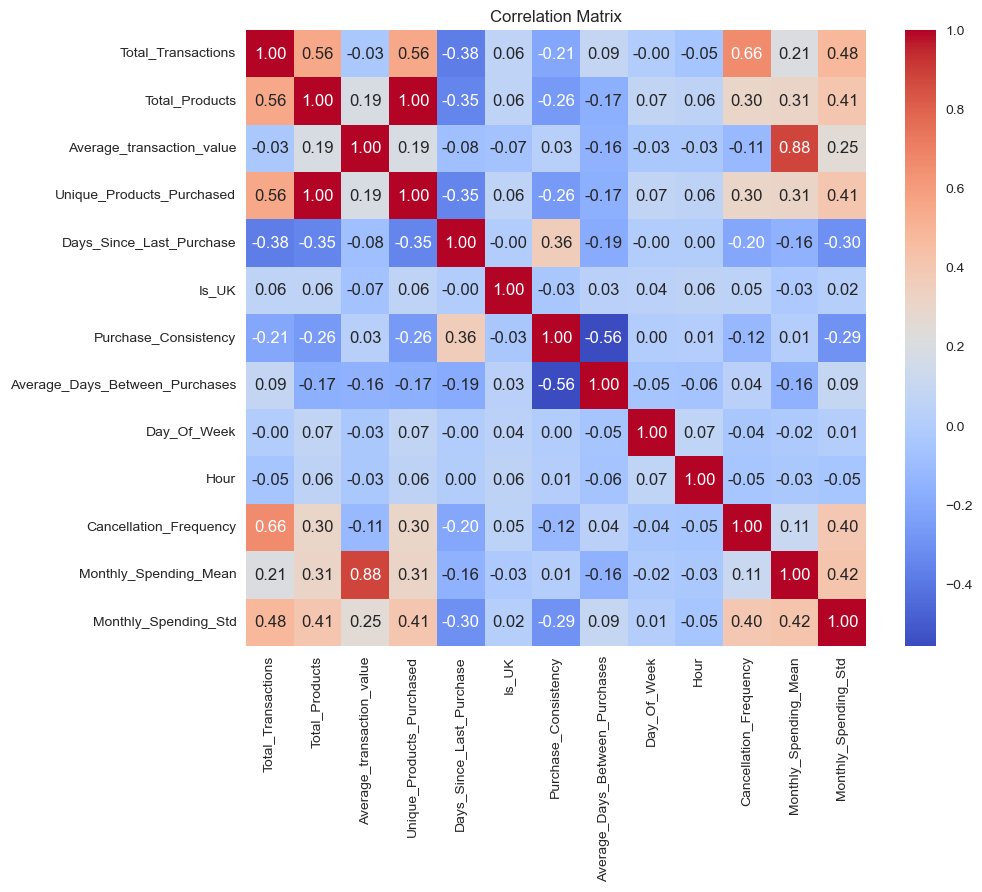

In [821]:
correlation_matrix = customer_df.drop(columns=['CustomerID']).corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

From The correlation matrix we see that there are some features have high correlation such as: 
- Total_products and Total_transaction
- Cancellation_frequency and Total_total_transaction
- Average_transaction_value and Monthly_spending_mean
- Monthly_spending_mean and Monthly_spending_Std

Therefore in order to avoid the impact of multicollinearity which is a problem on kmeans clustering it might be better to treat this multicollinearity through dimensionality reduction techniques such as PCA but first let's apply feature scaling to ensure a balanced influence on the model and to reveal the true patterns in the data.

#### Feature Scaling 

In [822]:
# Get the numerical columns to scale
numerical_columns = customer_df.drop(columns=['CustomerID', 'Is_UK', 'Day_Of_Week']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
df_customer_scaled = customer_df.copy()  # Make a copy of the DataFrame
df_customer_scaled[numerical_columns] = scaler.fit_transform(df_customer_scaled[numerical_columns])
df_customer_scaled 

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std
0,12346.0,-0.480207,-0.968114,-1.372109,-0.968114,2.351202,1,0.930337,-0.586142,1,-1.103456,0.421570,-1.378355,-0.710551
1,12347.0,0.761314,0.940690,1.646975,0.940690,-0.906945,0,-0.722637,-0.131047,1,0.649466,-0.528962,1.074839,1.327559
2,12350.0,-0.728511,-0.687407,0.071448,-0.687407,2.199895,0,0.930337,-0.586142,2,1.525927,-0.528962,-0.205375,-0.710551
3,12352.0,1.009618,0.079857,-0.596510,0.079857,-0.563982,0,-1.218529,0.120799,1,0.649466,0.421570,-0.117910,0.094369
4,12353.0,-0.728511,-0.911973,-0.935708,-0.911973,1.130658,0,0.930337,-0.586142,3,1.964158,-0.528962,-1.023752,-0.710551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,-0.728511,-0.799690,-0.486558,-0.799690,1.867019,1,0.930337,-0.586142,0,-1.541686,-0.528962,-0.658789,-0.710551
3917,18281.0,-0.728511,-0.855831,-0.975817,-0.855831,0.888566,1,0.930337,-0.586142,6,-1.103456,-0.528962,-1.056343,-0.710551
3918,18282.0,-0.231902,-0.762263,-1.083463,-0.762263,-0.856509,1,-1.218529,1.651824,4,0.211236,0.421570,-1.026541,-0.622156
3919,18283.0,2.996051,3.916179,-0.747056,3.916179,-0.896858,1,0.333430,-0.481161,3,0.649466,-0.528962,-0.565724,0.280199


#### Dimensionality Reduction

Now Given the multicollinearity identified in the dataset I am going to apply PCA so that it will reduce the number of features in our dataset while retaining most of the vairance, thus making our clustering analysis potentially more accurate and interpretable.
But before doing so I will apply PCA on the scaled data and then I will plot the cumulative variance explained explained by the feautures

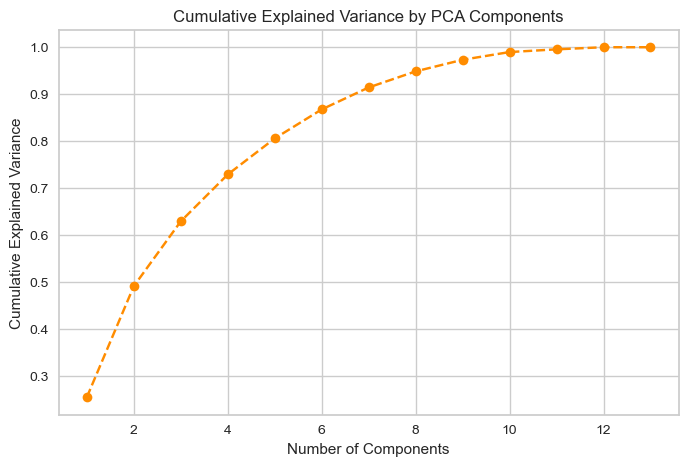

In [823]:
# Setting CustomerID as the index column
df_customer_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(df_customer_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Assuming pca and cumulative_variance are already defined as shown before
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

From the plot we can see that the increas ein cumulative variance starts to decrease after the 5th component. Therefore, considering the context of customer segmentation, keeping the first 5 components will be a balanced choice as they explain 80% of the variance.
The next step will be to create object with 6 components.

In [824]:
# Creating a PCA object with 6 components
pca = PCA(n_components=5)

# Apply PCA transformation to the new dataframe
df_customer_pca = pca.fit_transform(df_customer_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
df_customer_pca = pd.DataFrame(df_customer_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
df_customer_pca.index = df_customer_scaled.index 

# Display the results
df_customer_pca.head()

,PC1,PC2,PC3,PC4,PC5
CustomerID,,,,,
12346.0,-3.031830,-0.607620,-0.477810,-1.728088,1.461788
12347.0,1.833166,-2.237546,1.156551,0.927886,-1.010724
12350.0,-2.231589,0.303909,1.189636,-0.899868,-0.640786
12352.0,0.352632,-1.758483,-1.216455,-0.106970,-0.520168
12353.0,-2.183955,1.381582,0.014114,-1.214377,-0.973260


#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


In reviewing FarTrend's customer database, it is apparent that data anomalies such as negative quantities and unit prices could indicate returns or cancellations, a common occurrence in e-commerce transactions. The substantial amount of missing CustomerIDs, constituting about 25% of the dataset, necessitates careful consideration; these IDs are crucial for accurate customer behavior analysis and the effectiveness of subsequent predictive modeling. Furthermore, the discovery of duplicates and the decision to exclude them, along with the decision to retain negative quantities representing cancellations, underscores an intent to refine the dataset, enhancing the reliability of the recommendation system and customer segmentation.

The correlation matrix reveals significant correlations between features like Total_Products and Total_Transactions, suggesting a potential redundancy that could influence the clustering algorithm's performance. High correlations indicate that customers purchasing a variety of products also tend to transact more frequently. Such insights, along with the understanding of purchase consistency and cancellation frequencies, are pivotal in crafting a nuanced approach to customer engagement. Before employing PCA for dimensionality reduction, the optimal number of components to retain must be determined, ensuring that the most informative aspects of customer behavior are captured without unnecessary complexity. This process sets the stage for a more sophisticated, data-driven marketing strategy, aligning with FarTrend's goal of personalized customer engagement and predictive analytics for new customer purchases.

## Question 2: Segment the clients based on their purchase profile (35 points)

#### Q2.1 Build a baseline model to segment the costumers. (15 points)

#### Elbow method

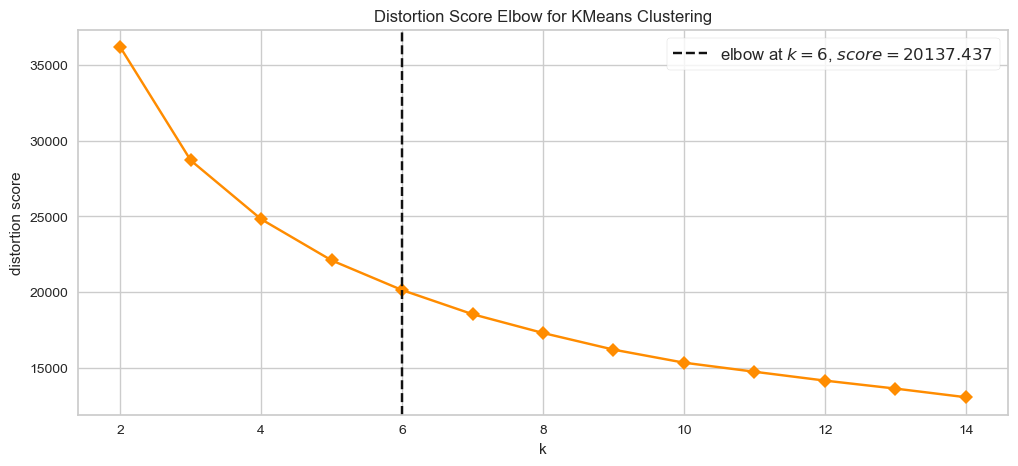

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [825]:
# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(df_customer_pca)

# Finalize and render the figure 
visualizer.show()

The elbow point is around 7. However, it's not a sharply defined elbow, and the slope continues to decrease gradually past this point. Therefore, I will proceed my analysis by calculating the silhouette score so that I can choose the best k within the range from 5 to 9. I choose this range because it captures the region around the elbow and includes the potential optimal values just before and after the elbow point.

Now I am going to apply to Kmeans 

/Users/manuelpantaleo/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


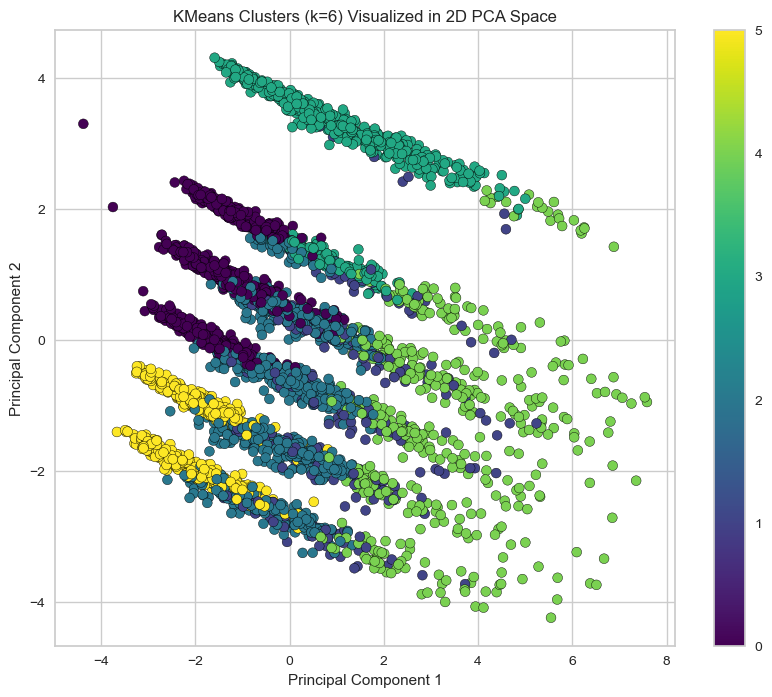

In [826]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_customer_pca)
clusters = kmeans.labels_

# Perform PCA for dimensionality reduction for visualization (2D)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_customer_pca)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50)
plt.title('KMeans Clusters (k=6) Visualized in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [833]:
# Add the cluster labels to the original DataFrame that was used for PCA
customer_df['Cluster_Labels'] = clusters

# Calculate the mean of features for each cluster
kmeans_characteristics = customer_df.groupby('Cluster_Labels').mean()

# Explore the characteristics of each cluster
display(kmeans_characteristics) 


,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Hierarchical_Cluster_Labels
Cluster_Labels,,,,,,,,,,,,,,,
0,15378.715060,1.567714,22.361863,225.232032,22.361863,155.665222,0.903575,0.964317,0.576996,2.971831,12.704225,0.180932,254.355537,27.587531,2.859155
1,14983.544262,3.065574,63.678689,739.759289,63.678689,81.114754,0.881967,0.764620,1.493023,2.039344,12.160656,0.226230,877.793710,243.082738,2.413115
2,15393.846234,4.336820,44.576360,220.686672,44.576360,50.109833,0.939331,0.440207,6.967187,1.730126,12.426778,0.576360,264.864367,130.850086,0.158996
3,15341.046105,3.470588,58.988871,253.565771,58.988871,79.925278,0.942766,0.701427,2.172384,5.573927,12.786963,0.308426,307.744936,105.917960,1.553259
4,15394.913386,11.206693,141.610236,302.208235,141.610236,26.905512,0.964567,0.676124,1.598441,2.427165,12.421260,2.112205,491.830082,305.719152,0.736220
5,15403.541667,1.701667,25.076667,232.837199,25.076667,133.530000,0.918333,0.956129,0.594721,0.453333,12.358333,0.213333,262.209084,32.692639,4.516667


#### Q2.2 Build a second model to segment costumers and compare the performance. (10 points)

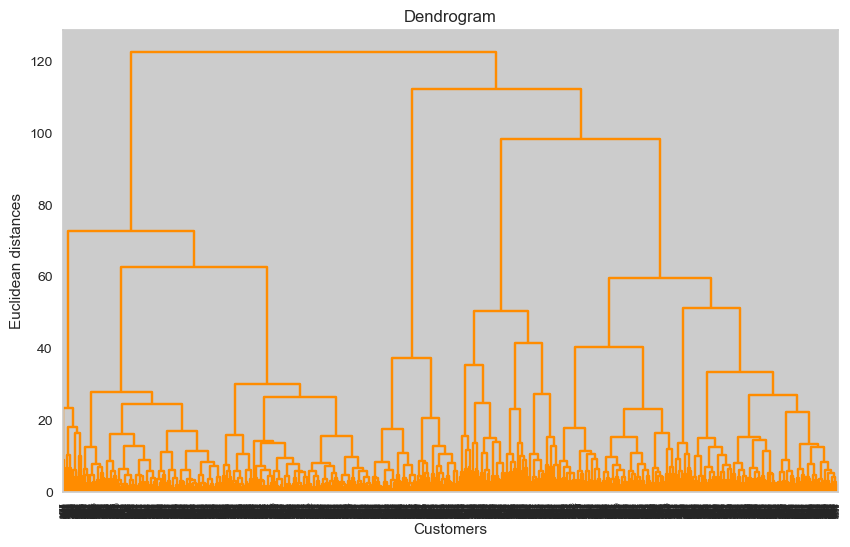

In [828]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

def apply_hierarchical_clustering(data, n_clusters):
    # Initialize AgglomerativeClustering with the specified number of clusters
    clustering = AgglomerativeClustering(n_clusters=n_clusters)

    # Fit the model to the data
    clustering.fit(data)
    
    # Plot dendrogram
    plt.figure(figsize=(10, 6))
    dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
    plt.title('Dendrogram')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distances')
    plt.show()
    
    return clustering.labels_

# Example usage:
# Assuming data is your feature matrix (e.g., numpy array or DataFrame)
# Set n_clusters to the number of clusters you want to create
n_clusters = 6
labels = apply_hierarchical_clustering(df_customer_pca, n_clusters)

In [832]:
# Add the hierarchical cluster labels to your dataframe
customer_df['Hierarchical_Cluster_Labels'] = labels

# Compute the mean/median for each cluster
cluster_characteristics = customer_df.groupby('Hierarchical_Cluster_Labels').mean()

# Print out the cluster characteristics
display(cluster_characteristics) 

,CustomerID,Total_Transactions,Total_Products,Average_transaction_value,Unique_Products_Purchased,Days_Since_Last_Purchase,Is_UK,Purchase_Consistency,Average_Days_Between_Purchases,Day_Of_Week,Hour,Cancellation_Frequency,Monthly_Spending_Mean,Monthly_Spending_Std,Cluster_Labels
Hierarchical_Cluster_Labels,,,,,,,,,,,,,,,
0,15312.863539,4.601990,52.365316,251.191790,52.365316,53.943141,0.918977,0.516436,5.482289,2.003554,12.463397,0.646055,309.765864,153.449642,2.186212
1,15447.525692,10.448617,143.484190,336.721168,143.484190,27.136364,0.970356,0.656145,1.663742,2.926877,12.383399,1.820158,524.976247,330.241926,3.460474
2,15437.703125,2.872768,47.131696,240.444350,47.131696,94.756696,0.968750,0.744017,2.093559,6.000000,12.854911,0.265625,287.476305,84.650451,3.000000
3,15328.950993,1.360265,22.080795,252.210823,22.080795,151.792053,0.907285,0.986244,0.309413,3.063576,12.940397,0.116556,280.016760,12.990701,0.092715
4,15024.750000,2.096154,59.519231,1016.071814,59.519231,96.115385,0.894231,0.858250,0.736780,1.903846,12.682692,0.067308,1172.399562,125.750773,1.028846
5,15377.519258,1.613409,23.549215,241.928262,23.549215,147.937233,0.911555,0.965237,0.542453,0.757489,12.029957,0.196862,275.098616,31.988582,3.977175


#### Q2.3 Based on the analysis, suggest a number of clusters and their characteristics to the head of marketing. Please justify your decisions. (10 points)

The hierarchical clustering output has presented distinctive means across different features for each cluster. It shows varying levels of customer engagement, as indicated by differences in total transactions, average transaction value, and unique products purchased.

On the other hand, the KMeans clustering model has also differentiated customer groups effectively, demonstrated by the variation in means across clusters for the same set of features.

To suggest the number of clusters to the head of marketing:

- Hierarchical Clustering: The results show distinct customer segments, such as clusters with higher average transaction values or more days since last purchase, which could 
  indicate less frequent but potentially more valuable customers. Other clusters have higher frequencies of transactions or purchase consistency, suggesting regular customers.

- KMeans Clustering: This model reveals customer groups with significant differences in behavior, such as monthly spending mean and standard deviation, which are critical for 
  tailoring marketing campaigns and predicting future purchases.

Both models have their merits, but the head of marketing may prefer KMeans if they value well-defined, distinct customer groups over potentially more nuanced clusters that hierarchical methods might offer. The mean of features in the KMeans clusters is typically more differentiated, which could be more actionable for marketing strategies. Given the graphical analysis and the interpretation of the cluster means, the marketing team might find a KMeans model with 6 clusters to be practically useful as it presents a balance between having a manageable number of segments and achieving a meaningful differentiation between them.

In conclusion, based on the provided information, a KMeans model with 6 clusters is suggested as the optimal choice for FarTrend's marketing team. This model provides distinct and interpretable customer segments that can directly inform personalized marketing efforts and enhance customer relationship management.

## Question 3: Create a recommendation system that helps the company to increase sales (35 points)


#### Q3.1 Build the recommendation system. (25 points)

In [847]:
# Merge the transactional dataframe and the customer info dataframe 
combined_df = pd.merge(df, customer_df, on='CustomerID', how='inner')

# Create a user-item matrix
user_item_matrix = combined_df.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack(fill_value=0)

# Compute the item-item similarity matrix
item_similarity = cosine_similarity(user_item_matrix.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

# Split the data
mask = np.random.rand(len(combined_df)) < 0.8
train_data = combined_df[mask]
test_data = combined_df[~mask]

# Create user-item matrices for train and test data
train_user_item_matrix = train_data.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack(fill_value=0)
test_user_item_matrix = test_data.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack(fill_value=0)
test_user_item_matrix = test_user_item_matrix.reindex(index=train_user_item_matrix.index, columns=train_user_item_matrix.columns, fill_value=0)

# Recalculate item similarity using only training data
train_item_similarity = cosine_similarity(train_user_item_matrix.T)
item_similarity_df = pd.DataFrame(train_item_similarity, index=train_user_item_matrix.columns, columns=train_user_item_matrix.columns)

# Define a function to predict top N recommendations for a user
def predict_top_n(user_id, similarity_df, user_item_matrix, n=5):
    # Check if user_id exists in the matrix
    if user_id not in user_item_matrix.index:
        return []
    user_ratings = user_item_matrix.loc[user_id]
    scored_items = similarity_df.dot(user_ratings).sort_values(ascending=False)
    
    # Filter out items the user has already interacted with
    scored_items = scored_items[~scored_items.index.isin(user_ratings[user_ratings > 0].index)]
    
    return scored_items.head(n).index.tolist()

# Define the Hit Rate computation function
def compute_hit_rate(test_data, user_item_matrix, similarity_df, n=5):
    hits = 0
    total = 0
    for user_id in test_data.index.unique():
        actual_items = set(test_data.loc[user_id][test_data.loc[user_id] > 0].index)
        if not actual_items:
            continue
        predicted_items = set(predict_top_n(user_id, similarity_df, user_item_matrix, n))
        if actual_items & predicted_items:
            hits += 1
        total += 1
    return hits / total if total > 0 else 0

# Example usage
hit_rate = compute_hit_rate(test_user_item_matrix, train_user_item_matrix, item_similarity_df, n=5)
print(f"Hit Rate: {hit_rate}")

Hit Rate: 0.30134048257372653


#### Q3.2 Based on the analysis, suggest how the model can be used in marketing. Which data would you like to have to improve the results? Please justify your decisions. (10 points)

The model, yielding a Hit Rate of approximately 30%, provides a foundation upon which FarTrend's marketing strategy can be enhanced. With this model, FarTrend can identify products that individual customers are likely to purchase based on their past buying habits and the behavior of similar customers. These predictions can be used for personalized marketing, such as tailored email campaigns, product recommendations on the website, or targeted promotions, increasing the likelihood of customer engagement and sales.

To improve the model's performance, additional data could be highly valuable. For instance:

- Customer Demographics: Information like age, gender, and income could refine the personalization of recommendations, assuming certain products appeal more to specific 
  demographics.
- Temporal Data: Understanding when purchases are made (time of day, day of the week, season) could allow for time-specific recommendations, leveraging patterns in customer 
  behavior over time.
- Product Information: More detailed product attributes (category, brand, price range) would enable the recommendation of similar items and aid in cross-selling strategies.
- Customer Feedback: Ratings, reviews, and returns data could provide insight into product popularity and customer satisfaction, allowing the system to favor well-received 
  items.

Behavioral Data: Web analytics data, such as page views, time spent on pages, and cart abandonment rates, can signal customer interest and intent.
By integrating these additional data points, the recommendation system can become more sophisticated, leading to more accurate predictions and, subsequently, a higher Hit Rate. This multi-faceted approach can greatly benefit FarTrend's marketing efforts by ensuring that customers are presented with products that are relevant and appealing to them, thereby fostering loyalty and increasing revenue.